In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from numpy import linalg as LA # libreria de álgebra lineal

# **Analíticamente**




In [ ]:
A= np.array([[1,-1,4],
              [3,2,-1],
              [2,1,-1]])
A

array([[ 1, -1,  4],
       [ 3,  2, -1],
       [ 2,  1, -1]])

In [ ]:
I= np.array([[1,0,0],
             [0,1,0],
             [0,0,1]])
I

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [ ]:
I_s= sp. Matrix(I)

In [ ]:
B= sp.Matrix(A)
C= sp.Matrix(I)

In [ ]:
lambda_= sp.Symbol("lambda")
lambda_

lambda

In [ ]:
M= B-lambda_*I_s
M

Matrix([
[1 - lambda,         -1,           4],
[         3, 2 - lambda,          -1],
[         2,          1, -lambda - 1]])

In [ ]:
# Polinomio característico

det= M.det()
det

-lambda**3 + 2*lambda**2 + 5*lambda - 6

In [ ]:
np.poly(A)

array([ 1., -2., -5.,  6.])

In [ ]:
# Valores propios y vectores propios

np.linalg.eig(A)

(array([ 3., -2.,  1.]),
 array([[ 0.40824829,  0.57735027,  0.23570226],
        [ 0.81649658, -0.57735027, -0.94280904],
        [ 0.40824829, -0.57735027, -0.23570226]]))

# **Generalizar determinante  3x3**

In [ ]:
# Determinante de una matriz 2x2

def det(M):
 return M[0,0]*M[1,1]-M[1,0]*M[0,1]

In [ ]:
def det_3 (M1):
  d= M1[0,0]*det(M1[1:3:1,1:3:1])-M1[1,0]*det(M1[0:3:2,1:3:1])+ M1[2,0]*det(M1[0:2:1,1:3:1])
  return d

In [ ]:
det_3(B)

-6

In [ ]:
# Polinomío característico
pol= B-lambda_*I_s
pol_= sp.poly(det_3(pol))
pol_

Poly(-lambda**3 + 2*lambda**2 + 5*lambda - 6, lambda, domain='ZZ')

# **Generalización para determinar los vectores propios**

In [ ]:
# Valores propios de la matriz

pol= B-lambda_*I_s
pol_= sp.poly(det_3(pol))

sol1,sol2,sol3,= sp.solve(pol_)
sol1,sol2,sol3

(-2, 1, 3)

In [ ]:
B2= B-sol1*I_s
B2

Matrix([
[3, -1,  4],
[3,  4, -1],
[2,  1,  1]])

In [ ]:
B1= B-sol2*I_s
B1

Matrix([
[0, -1,  4],
[3,  1, -1],
[2,  1, -2]])

In [ ]:
B3= B-sol3*I_s
B3

Matrix([
[-2, -1,  4],
[ 3, -1, -1],
[ 2,  1, -4]])

In [ ]:
x1= sp.Symbol("x1")
x2= sp.Symbol("x2")
x3= sp.Symbol("x3")
X_= sp.Matrix([x1,x2,x3])
X_

Matrix([
[x1],
[x2],
[x3]])

In [ ]:
p= B2.rref()[0] # luego llamar a las variables x1,x2,x3
p

Matrix([
[1, 0,  1],
[0, 1, -1],
[0, 0,  0]])

In [ ]:
p*X_

Matrix([
[x1 + x3],
[x2 - x3],
[      0]])

In [ ]:
prueba= sp.solve(p*X_) # x3 debería tomar cualquier valor

In [ ]:
prueba

{x1: -x3, x2: x3}

In [ ]:
B2*X_ # cual es la columna LD

Matrix([
[3*x1 - x2 + 4*x3],
[3*x1 + 4*x2 - x3],
[  2*x1 + x2 + x3]])

In [ ]:
# comprobación librería
B2.nullspace(),B3.nullspace(),B1.nullspace()

([Matrix([
  [-1],
  [ 1],
  [ 1]])],
 [Matrix([
  [1],
  [2],
  [1]])],
 [Matrix([
  [-1],
  [ 4],
  [ 1]])])

In [ ]:
def vectores_(M):
  col= np.zeros((3,1))
  valores=[]

  if det_3(M) == 0:
    M_LD = M.rref()[0]
    Sol = sp.solve(M_LD*X_)
    for clave, objeto in Sol.items():
      columna= objeto/x3 # factorizar el elemento de ese vector
      valores.append(columna)
      for i, valor in enumerate(valores):
        col[i, 0] = valor
  return col.T

In [ ]:
np.shape(vectores_(B1))

(1, 3)

In [ ]:
Pp= np.array(((vectores_(B1)),(vectores_(B2)),(vectores_(B3)))).reshape(3,3).astype(int)
P_= sp.Matrix(Pp)
P= P_.T.subs({0:1})
P

Matrix([
[-1, -1, 1],
[ 4,  1, 2],
[ 1,  1, 1]])

In [ ]:
D= sp.Matrix(((1,0,0),
              (0,-2,0),
              (0,0,3)))
D

Matrix([
[1,  0, 0],
[0, -2, 0],
[0,  0, 3]])

In [ ]:
# Diagonalización

A_diag = P @ (D @ P.inv())
A_diag

Matrix([
[1, -1,  4],
[3,  2, -1],
[2,  1, -1]])

# **Parte 2**

In [ ]:
A_= np.array([[1,-2],
            [-2,3]])

In [ ]:
x= sp.Symbol("x")
y= sp.Symbol("y")

In [ ]:
def hiperbola(x, y):
    v = np.array([x, y])
    return np.array([(A_ @ v).dot(v)-6])

In [ ]:
hiperbola(x,y)

array([x*(x - 2*y) + y*(-2*x + 3*y) - 6], dtype=object)

In [ ]:
x_ = np.linspace(-5, 5, 400)
y_ = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x_, y_)

In [ ]:
hiperbola_vals = np.vectorize(hiperbola)(X,Y)

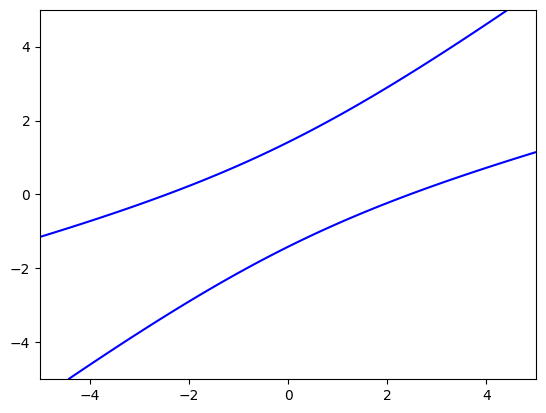

In [ ]:
plt.contour(X,Y, hiperbola_vals,levels=[0], colors='b')

In [ ]:
# Valores y vectores propios de A_

vp,Q= LA.eig(A_)
vp,Q

# V es la matriz de autovectores que son ortogonales entre si

(array([-0.23606798,  4.23606798]),
 array([[-0.85065081,  0.52573111],
        [-0.52573111, -0.85065081]]))

In [ ]:
D= Q.T @ A_ @ Q
D

array([[-2.36067977e-01, -3.46944695e-16],
       [-2.22044605e-16,  4.23606798e+00]])

In [ ]:
a= Q @ D @ Q.T
a # diagonizable ortogonalmente

array([[ 1., -2.],
       [-2.,  3.]])

In [ ]:
v = np.array((x, y))

In [ ]:
u= Q.T * v
u

array([[-0.85065080835204*x, -0.525731112119133*y],
       [0.525731112119133*x, -0.85065080835204*y]], dtype=object)

In [ ]:
# Hiperbola en la nueva base

d= (D @ u).dot(u)
d

array([[-0.170820393249937*x**2 + 0.0652475842498529*x*y,
        -0.105572809000084*x*y - 0.105572809000084*y**2],
       [-1.89442719099991*x**2 - 1.89442719099992*x*y,
        -1.17082039324994*x*y + 3.06524758424985*y**2]], dtype=object)